In [2]:
import numpy as np
import matplotlib.pyplot as plt 
from sklearn.datasets import make_circles

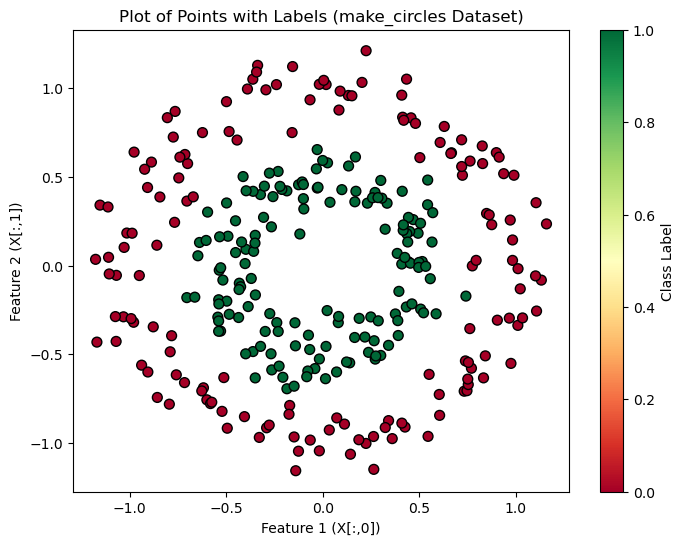

In [3]:
# Generate synthetic data using make_circles
X, y = make_circles(n_samples=300, noise=0.1, factor=0.5, random_state=0)

# Create a new figure for the plot
plt.figure(figsize=(8, 6))

# Scatter plot of the data points, colored by class label
plt.scatter(X[:, 0], X[:, 1], c=y, cmap=plt.cm.RdYlGn, edgecolors='k', marker='o', s=50)

# Label the axes
plt.xlabel('Feature 1 (X[:,0])')
plt.ylabel('Feature 2 (X[:,1])')

# Add a title and colorbar for clarity
plt.title('Plot of Points with Labels (make_circles Dataset)')
plt.colorbar(label='Class Label')

# Show the plot
plt.show()

In [4]:
# Import necessary libraries
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_circles
from sklearn.neural_network import MLPClassifier
import ipywidgets as widgets
from IPython.display import display
from ipywidgets import interactive

# Define a function to update the plot based on hidden layer size
def update_plot(hidden_layer_size):
    # Create and train the MLP classifier
    clf = MLPClassifier(hidden_layer_sizes=(hidden_layer_size,), activation='relu', max_iter=3000, random_state=1)
    clf.fit(X, y)

    # Create a grid of points to plot the decision boundary
    x_vals = np.linspace(X[:, 0].min() - 0.1, X[:, 0].max() + 0.1, 300)
    y_vals = np.linspace(X[:, 1].min() - 0.1, X[:, 1].max() + 0.1, 300)
    X_plane, Y_plane = np.meshgrid(x_vals, y_vals)
    grid_points = np.column_stack((X_plane.ravel(), Y_plane.ravel()))

    # Predict class for each grid point
    Z = clf.predict(grid_points)
    Z = Z.reshape(X_plane.shape)

    # Predict class for each training point
    y_pred = clf.predict(X)

    # Clear the current figure
    plt.clf()

    # Show the predicted class background using pcolormesh
    plt.pcolormesh(X_plane, Y_plane, Z, cmap=plt.cm.RdYlGn, shading='auto', alpha=0.3)

    # Plot the decision boundary
    plt.contour(X_plane, Y_plane, Z, levels=[-0.5, 0.5, 1.5], colors='k', linewidths=1, alpha=0.6)

    # Separate points by predicted class
    class_0 = y_pred == 0
    class_1 = y_pred == 1

    # Scatter plot for predicted class 0 and 1
    plt.scatter(X[class_0, 0], X[class_0, 1], c='red', edgecolors='k', marker='o', s=50, label='Predicted Class 0')
    plt.scatter(X[class_1, 0], X[class_1, 1], c='green', edgecolors='k', marker='o', s=50, label='Predicted Class 1')

    # Label axes and add title/legend
    plt.xlabel('Feature 1')
    plt.ylabel('Feature 2')
    plt.title(f'Decision Boundary and Predicted Labels (Hidden Layer Size = {hidden_layer_size})')
    plt.legend()
    plt.show()

# Create a slider widget for hidden layer size
hidden_layer_size_slider = widgets.IntSlider(value=1, min=1, max=20, step=1, description='Hidden Layer Size')

# Create an interactive plot using the slider
interactive_plot = interactive(update_plot, hidden_layer_size=hidden_layer_size_slider)

# Display the interactive plot
display(interactive_plot)

interactive(children=(IntSlider(value=1, description='Hidden Layer Size', max=20, min=1), Output()), _dom_clas…